<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [0. Описание проекта](#0.)
* [1. Шаг 1. Откройте файл с данными и изучите общую информацию](#1.)
     - [1.1. Вывод](#1.1.)
* [2. Шаг 2. Подготовьте данные](#2.)
     - [2.1. Группировка нескольких таблиц с данными в одну обобщенную](#2.1.)
     - [2.2. Найдите и исправьте ошибки в данных](#2.2.)
     - [2.3. Приведите данные к нужным типам](#2.3.)
     - [2.4. Расчет помесячной выручки для каждого пользователя](#2.4.)
     - [2.5. Сгруппированная таблица для каждого пользователя по количеству звонков, сообщений, гигабайтов и выручки за месяц](#2.5.)
     - [2.6. Вывод](#2.6.)
* [3. Шаг 3. Проанализируйте данные](#3.)
     - [3.1. Вывод](#3.1.)
* [4. Шаг 4. Проверьте гипотезы](#4.)
     - [4.1. Вывод](#4.1.)
     - [4.2. Вывод](#4.1.)
* [5. Общий вывод](#5.)

<strong><font size=5>1 Описание проекта</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файл с данными и изучите общую информацию<a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from operator import index

In [2]:
df_calls = pd.read_csv('calls.csv', index_col=0)
# df_calls.to_csv('calls.csv')
df_internet = pd.read_csv('internet.csv', index_col=0)
# df_internet.to_csv('internet.csv')
df_messages = pd.read_csv('messages.csv', index_col=0)
# df_messages.to_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv', index_col=0)
# df_tariffs.to_csv('tariffs.csv')
df_users = pd.read_csv('users.csv', index_col=0)
# df_users.to_csv('users.csv')

In [3]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_internet = df_internet.drop(columns=['Unnamed: 0'])
df_internet.info()
df_internet.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 144.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод<a name="1.1"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

По таблице users видно, что в анализе принимают участие данные 500 пользователей разных тарифов из разных городов. Всего 38 клиентов закончили пользоваться услугами оператора. Дифференциация происходит по двум тарифам "Ультра" и "Смарт". По каждому пользователю у нас есть информацию по количеству звонков, продолжительности звонков, количеству используемого интернет трафика, дате отправляемых сообщений, а также сведениям о тарифах. Данные в разных таблицах неоднородны, поэтому необходимо будет собрать все данные в одну таблицу методом Merge. Стоит также отметить, что пропуски присутствуют только в столбце churn_rate, который определяет дату окончания пользования тарифом.

## Шаг 2. Подготовьте данные<a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

На данном шаге мы приведем данные к нужным типам, найдем и исправим ошибки в данных. Также посчитаем для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя

In [8]:
#Создадим для каждого пользователя в df_users столбец с месяцем регистрации со всеми возможными значениями
df_users['reg_month'] = df_users['reg_date'].values.astype('datetime64[M]') 
min_month = df_users['reg_date'].values.astype('datetime64[M]').min()
max_month = df_users['reg_date'].values.astype('datetime64[M]').max()
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
#Создадим DataFrame со всеми значениями месяцев, присутствующих в таблице df_users
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS')) 
dr.columns = ['month']
print(len(df_users)*len(dr))
dr['key'] = 1
df_users['key'] = 1

6000


In [10]:
#Соединим таблицу со всеми значениями месяцев и таблицей df_users
df_users_merge = dr.merge(df_users,on='key') 
print('Количество записей после обработки: ', len(df_users_merge[df_users_merge['month']>=df_users_merge['reg_month']]))

Количество записей после обработки:  3259


In [11]:
#Оставим только актуальные наблюдения 
df_users_merge = df_users_merge[df_users_merge['month'] >= df_users_merge['reg_month']] 

In [12]:
#Переведем столбец month
df_users_merge['month'] = pd.DatetimeIndex(df_users_merge['month']).month

In [13]:
#Поменяем название столбца для дальнейшего объединения 
df_users_merge.rename(columns={'tariff': 'tariff_name'}, inplace=True) 
df_users_merge.head() 

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,reg_month
5,1,1,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01
32,1,1,1032,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01
45,1,1,1045,48,NaN,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01
55,1,1,1055,39,NaN,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01
71,1,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01


In [14]:
#Переведем столбцы month, где выделим месяц из даты
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month 
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month


In [15]:
#Переведем столбец из мб в гб
df_internet['gb_used'] = df_internet['mb_used'] / 1024 
del df_internet['mb_used']
calls_grouped = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_grouped.set_axis(['number_of_calls', 'call_duration'], axis='columns', inplace=True)                                                                                             
internet_grouped = df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum')
messages_grouped = df_messages.pivot_table(index=['user_id', 'month'], aggfunc='count')
del messages_grouped['id']
messages_grouped.set_axis(['number_of_messages'], axis='columns', inplace=True)
data_grouped = (calls_grouped, messages_grouped, internet_grouped)
for data in data_grouped:
    data.head(10)

### Группировка нескольких таблиц с данными в одну обобщенную.<a name="2.1"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [16]:
df = (
    calls_grouped.merge(internet_grouped, how='outer', on=('user_id', 'month'))
    .merge(messages_grouped, how='outer', on=('user_id', 'month'))
    .merge(df_users_merge, on=('user_id', 'month'), how='outer')
    .merge(df_tariffs, on='tariff_name', how='outer')
)

### Найдите и исправьте ошибки в данных.<a name="2.2"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [17]:
df['gb_per_month_included'] = df['mb_per_month_included'] / 1024
del df['mb_per_month_included']
df['number_of_calls'] = df['number_of_calls'].fillna(0)
df['call_duration'] = df['call_duration'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['number_of_messages'] = df['number_of_messages'].fillna(0)
del df['key']
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,reg_date,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,150.06,2.200674,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
1,1000,6,43.0,158.90,22.689229,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
2,1000,7,47.0,318.80,13.675430,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
3,1000,8,52.0,389.87,13.726494,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
4,1000,9,58.0,440.14,14.227451,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0


### Приведите данные к нужным типам<a name="2.3"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [18]:
df['call_duration'] = df['call_duration'].astype('int')
df['gb_used'] = df['gb_used'].round(2)
df['number_of_messages'] = df['number_of_messages'].astype('int')
df['number_of_calls'] = df['number_of_calls'].astype('int')
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,reg_date,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22,150,2.20,22,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
1,1000,6,43,158,22.69,60,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
2,1000,7,47,318,13.68,75,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
3,1000,8,52,389,13.73,81,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
4,1000,9,58,440,14.23,57,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0


In [19]:
print('Общее количество наблюдений: ', len(df))
print('Количество дубликатов: ', df.duplicated().sum())

Общее количество наблюдений:  3259
Количество дубликатов:  0


In [20]:
print('Количество пропущенных значений по столбцам: ', df.isna().sum())

Количество пропущенных значений по столбцам:  user_id                     0
month                       0
number_of_calls             0
call_duration               0
gb_used                     0
number_of_messages          0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
reg_month                   0
messages_included           0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64


### Расчет помесячной выручки для каждого пользователя<a name="2.4"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [21]:
def month_calc(row):
    calls = row['call_duration']
    messages = row['number_of_messages']
    internet = row['gb_used']
 
    tariff = row['tariff_name']
 
    minutes_lim = row['minutes_included']
    messages_lim = row['messages_included']
    internet_lim = row['gb_per_month_included']
 
    # переплата по звонкам
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * row['rub_per_minute']
 
    # переплата по сообщениям
    messages_overlimit = max(messages - messages_lim, 0)
    messages_overpay = messages_overlimit * row['rub_per_message']
 
    # переплата за трафик интернета
    internet_overlimit = np.ceil(max(internet - internet_lim, 0))   
    internet_overpay = internet_overlimit * row['rub_per_gb']
 
    return (call_overpay + messages_overpay + internet_overpay + row['rub_monthly_fee'])
 
df['month_payment'] = df.apply(month_calc, axis=1)
df['month_payment'] = df['month_payment'].round(2)
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,month_payment
0,1000,5,22,150,2.20,22,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
1,1000,6,43,158,22.69,60,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
2,1000,7,47,318,13.68,75,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
3,1000,8,52,389,13.73,81,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
4,1000,9,58,440,14.23,57,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0


### Сгруппированная таблица для каждого пользователя по количеству звонков, сообщений, гигабайтов и выручки за месяц<a name="2.5"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [22]:
df_grouped = df.pivot_table(index=['user_id', 'month'], values=['number_of_calls', 'call_duration', 'gb_used', 'number_of_messages', 'month_payment'], aggfunc='sum')
df_grouped.head(15)

call_duration  gb_used  month_payment  number_of_calls  \
user_id month                                                           
1000    5                150     2.20         1950.0               22   
        6                158    22.69         1950.0               43   
        7                318    13.68         1950.0               47   
        8                389    13.73         1950.0               52   
        9                440    14.23         1950.0               58   
        10               328    14.36         1950.0               57   
        11               319    14.41         1950.0               43   
        12               312     9.59         1950.0               46   
1001    11               408    18.00         1150.0               59   
        12               391    13.71          550.0               63   
1002    6                110    10.60          550.0               15   
        7                204    17.17         1150.0               26   
        8                269    19.84         1550.0               42   
        9                195    16.30          950.0               36   
        10               199    13.56          550.0               33   

               number_of_messages  
user_id month                      
1000    5                      22  
        6                      60  
        7                      75  
        8                      81  
        9                      57  
        10                     73  
        11                     58  
        12                     70  
1001    11                      0  
        12                      0  
1002    6                       4  
        7                      11  
        8                      13  
        9                       4  
        10                     10

### Вывод<a name="2.6"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Были добавлены столбцы с месяцем для каждого пользователя в таблицы df_users, df_calls, df_internet, df_messages, чтобы в дальнейшем производить соединение по этому столбцу. Столбец mb_used был преобразовал в столбец gb_used. 
Таблицы calls_grouped, internet_grouped, messages_grouped, report, df_tariffs были сгруппированы в таблицу df. В столбцах number_of_calls, call_duration, gb_used, number_of_messages пропущенные данные были заполены "0", так как эти данные могут быть не заполнены по нескольким причинам: 1) по причине объединения таблиц; 2) по причине того, что клиент не пользовался данными услугами. Обе этих причины позволяют заполнить данные "0". 
Данные в столбца number_of_messages, call_duration и number_of_calls были приведены к типу int, так как эти данные могут быть только целочисленными. Был посчитан столбец month_payment с учетом перерасчетов по тарифам. В таблице df_grouped были посчитаны суммарные значения по месяцам для каждого пользователя по столбцам call_duration,	gb_used	month_payment, number_of_calls и	number_of_messages.

## Шаг 3. Проанализируйте данные<a name="3."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

AxesSubplot(0.125,0.125;0.775x0.755)


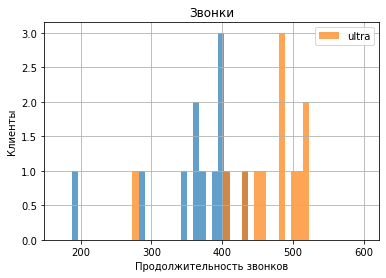

AxesSubplot(0.125,0.125;0.775x0.755)


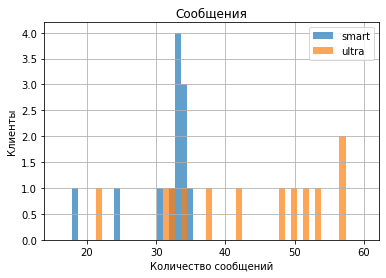

AxesSubplot(0.125,0.125;0.775x0.755)


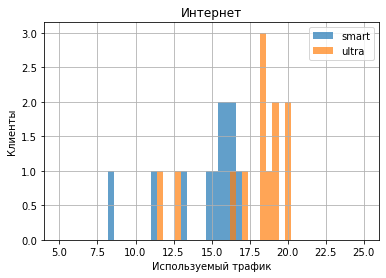

In [23]:
df_smart = df.query('tariff_name == "smart"')
df_ultra = df.query('tariff_name == "ultra"')
df_smart_calls = df_smart.pivot_table(index='month', values='call_duration', aggfunc='mean')
df_smart_messages = df_smart.pivot_table(index='month', values='number_of_messages', aggfunc='mean')
df_smart_internet = df_smart.pivot_table(index='month', values='gb_used', aggfunc='mean')
df_ultra_calls = df_ultra.pivot_table(index='month', values='call_duration', aggfunc='mean')
df_ultra_messages = df_ultra.pivot_table(index='month', values='number_of_messages', aggfunc='mean')
df_ultra_internet = df_ultra.pivot_table(index='month', values='gb_used', aggfunc='mean')
ax_calls = df_smart_calls['call_duration'].plot(kind='hist', y='call_duration', range=(170, 600), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_calls['call_duration'].plot(kind='hist', y='call_duration', range=(170,600), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_calls, grid=True, legend=True, title='Звонки')
_ = plt.xlabel('Продолжительность звонков')
_ = plt.ylabel('Клиенты')
print(ax_calls)
plt.show()
ax_messages = df_smart_messages.plot(kind='hist', y='number_of_messages', range=(16, 60), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_messages.plot(kind='hist', y='number_of_messages', range=(16,60), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_messages, grid=True, legend=True, title='Сообщения')
_ = plt.xlabel('Количество сообщений')
_ = plt.ylabel('Клиенты')
print(ax_messages)
plt.show()
ax_internet = df_smart_internet.plot(kind='hist', y='gb_used', range=(5, 25), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_internet.plot(kind='hist', y='gb_used', range=(5, 25), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_internet, grid=True, legend=True, title='Интернет')
_ = plt.xlabel('Используемый трафик')
_ = plt.ylabel('Клиенты')
print(ax_internet)
plt.show()


In [24]:
smart_month_payment = df_smart['month_payment']
smart_month_payment.reset_index(drop=True)
print(smart_month_payment.value_counts())
print('Общее количество наблюдений с пользователями "Смарт":', smart_month_payment.count())

550.0     624
950.0     102
1350.0     85
1150.0     84
750.0      77
         ... 
2080.0      1
2136.0      1
2945.0      1
2085.0      1
1405.0      1
Name: month_payment, Length: 697, dtype: int64
Общее количество наблюдений с пользователями "Смарт": 2253


In [25]:
ultra_month_payment = df_ultra['month_payment']
ultra_month_payment.reset_index(drop=True)
print(ultra_month_payment.value_counts())
print('Общее количество наблюдений с пользователями "Ультра":', ultra_month_payment.count())

1950.0    872
2250.0     21
2400.0     18
2550.0     13
2100.0     12
2700.0     10
3000.0     10
3750.0      9
3150.0      9
3300.0      9
2850.0      7
3900.0      6
3450.0      4
3600.0      2
4800.0      1
4650.0      1
4200.0      1
4050.0      1
Name: month_payment, dtype: int64
Общее количество наблюдений с пользователями "Ультра": 1006


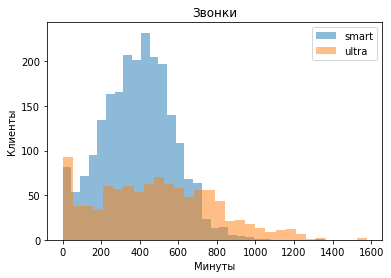

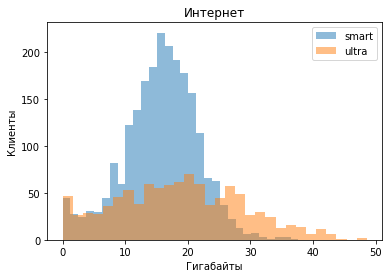

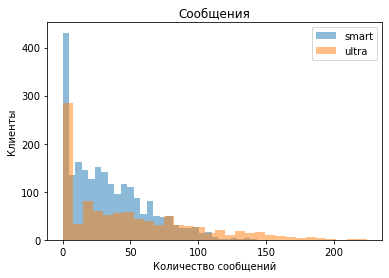

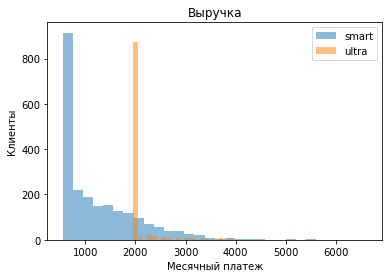

In [26]:
grouped_data = df.pivot_table(index='tariff_name', values=['call_duration', 'gb_used', 'number_of_messages', 'month_payment'], aggfunc=['mean', 'var', 'std'])
grouped_data.columns = ['call_duration_mean', 'gb_used_mean', 'month_payment_mean', 'number_of_messages_mean', 'call_duration_var', 'gb_used_var', 'month_payment_var', 'number_of_messages_var',  'call_duration_std', 'gb_used_std', 'month_payment_std', 'number_of_messages_std', ]
grouped_data

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['call_duration'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Звонки')
_ = plt.xlabel('Минуты')
_ = plt.ylabel('Клиенты')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['gb_used'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Интернет')
_ = plt.xlabel('Гигабайты')
_ = plt.ylabel('Клиенты')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['number_of_messages'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Сообщения')
_ = plt.xlabel('Количество сообщений')
_ = plt.ylabel('Клиенты')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['month_payment'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Выручка')
_ = plt.xlabel('Месячный платеж')
_ = plt.ylabel('Клиенты')
plt.show()




### Вывод<a name="3.1"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Согласно графику call_duration у обоих тарифов видны выделяющиеся столбцы в районе от 0 до 20 минут/месяц, таких пользователей около 70. У тарифа "Смарт" выделяется явный пик в районе 400 минут/месяц, около 240 клиентов. Распределение звонков у тарифа "Смарт" в среднем идет до 1000 минус/месяц, после чего значения крайни редки или прекращаются. В то время как у тарифа "Ультра", несмотря на пик в районе 20 минут/месяц, распределение идет равномерно с уменьшением в районе 800 минут/месяц, в то время как встречаются пользователи со значениями около 1600 минут/месяц. Пользователи тарифа "Смарт" в основном пользуются от 10 до 22 гигабайт в месяц с пиком в районе 16 гб/месяц. Пользователи "Ультра" используют более равномерно трафик с  пиком около 20 гб/месяц, но при этом в отличие от пользователей "Смарта" используют больше 25 гб/месяц. Пользователи обоих тарифных планов используют около 5-10 сообщений в месяц, о чем свидетельствуют пики около 0, таких пользователей у тарифов "Смарт" и "Ультра" 402 и 280 соответственно. У пользователей тарифа "Смарт" все три показателя звонки, интернет и сообщения характеризуются как графики с нормальным распределением.
Согласно графику интернет трафика очевидно, что пользователи тарифа "Смарт" обычно выходят за пределы ежемесячного трафика, в то время как по остальным видам связи пользователи обычно не выбиваются из пределов тарифа.

## Шаг 4. Проверьте гипотезы<a name="4."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [27]:
var = df.pivot_table(index='tariff_name', values='month_payment', aggfunc='var')
var

,month_payment
tariff_name,
smart,639135.206961
ultra,138855.041393


У нас есть основание полагать, что выборки взяты из схожих по параметрам совокупностей, поэтому значение equal_var=False. Воспользуемся критерием Т-стъюдента, так как тарифу "Смарт" соотвествует нормальному распределению. </br>

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. </br>
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [28]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart_month_payment, ultra_month_payment, equal_var=False)

print('p-значение: {}'.format(results.pvalue))


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 1.5505504964270941e-283
Отвергаем нулевую гипотезу


### Вывод<a name="4.1"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Можно сделать вывод, что средние двух выборочных совокупностей не равны, о чем свидетельствует p-значение равное ~0.0.

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. </br>
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [29]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df.query('city == "Москва"')['month_payment'], df.query('city != "Москва"')['month_payment'], equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 0.36701343553970556
Не можем отвергнуть нулевую гипотезу


### Вывод<a name="4.2"></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Можно сделать вывод, что хотя и средние двух выборочных совокупностей по Москве и другим регионам равны, с вероятностью в почти 37% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между Москвой и регионами.

## Общий вывод

По результатам исследования можно сделать вывод, что тариф "Смарт" характеризуется более низкими средними показателями по сравнению с тарифом "Ультра": звонки ("Смарт": 389.73, "Ультра": 486.22), интернет ("Смарт": 15.66, "Ультра": 18.62), сообщения("Смарт": 33.03, "Ультра": 48.33). при этом люди с таким тарифом чаще склонны к переплатам по тарифу. Это свидетельствует о том, что люди с тарифом "Ультра", возможно, берут тариф с расчетом на болельшее количество минут и интернета, а также с расчетом на возможные переплаты по тарифу "Смарт". Но все же люди с тарифом "Смарт" обычно не переплачивают на столько, чтобы по сумме заплатить больше, чем за тариф "Ультра". 
В 872 из 1006 наблюдений свидетельствуют, что клиенты используют тариф "Ультра", не переплачивая за перерасход, что может свидетельствовать о комфортных для клиентов тарифных рамок по звонкам, интернету и сообщениям. В то время как всего в 624 из 2253 в тарифе "Смарт" не выходят за рамки месячной платы. Исходя из этого можно предположить, что тариф "Ультра" самый комфортный для пользоватлей тариф.   
Возможно, компании стоит незначительно уменьшить в тарифе количество включенного интернета и звонков при этом спустив границу у тарифа "Ультра", тогда пользователи захотят перейти на тариф "Ультра", что повлечет за собой увеличение среднемесячной выручки, а, соотвественно, и увеличение общей выручки компании. Либо несколько увеличить плату за перерасход по тарифу, что должно повлечь такие же последствия.